In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_car.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11914, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
data['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

In [8]:
#checking null valuees
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
# Identify percentage of null values
null_percent = (data.isnull().sum()/data.shape[0])*100
null_data_percent = null_percent[null_percent>0]
null_data_percent = pd.DataFrame(null_data_percent,columns=['Percentage of null values'])
null_data_percent.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
Market Category,31.408427
Engine HP,0.579151
Engine Cylinders,0.251805
Number of Doors,0.050361
Engine Fuel Type,0.025180


In [10]:
# Drop null values
data.dropna(inplace=True)

In [11]:
data.shape

(8084, 16)

<AxesSubplot:>

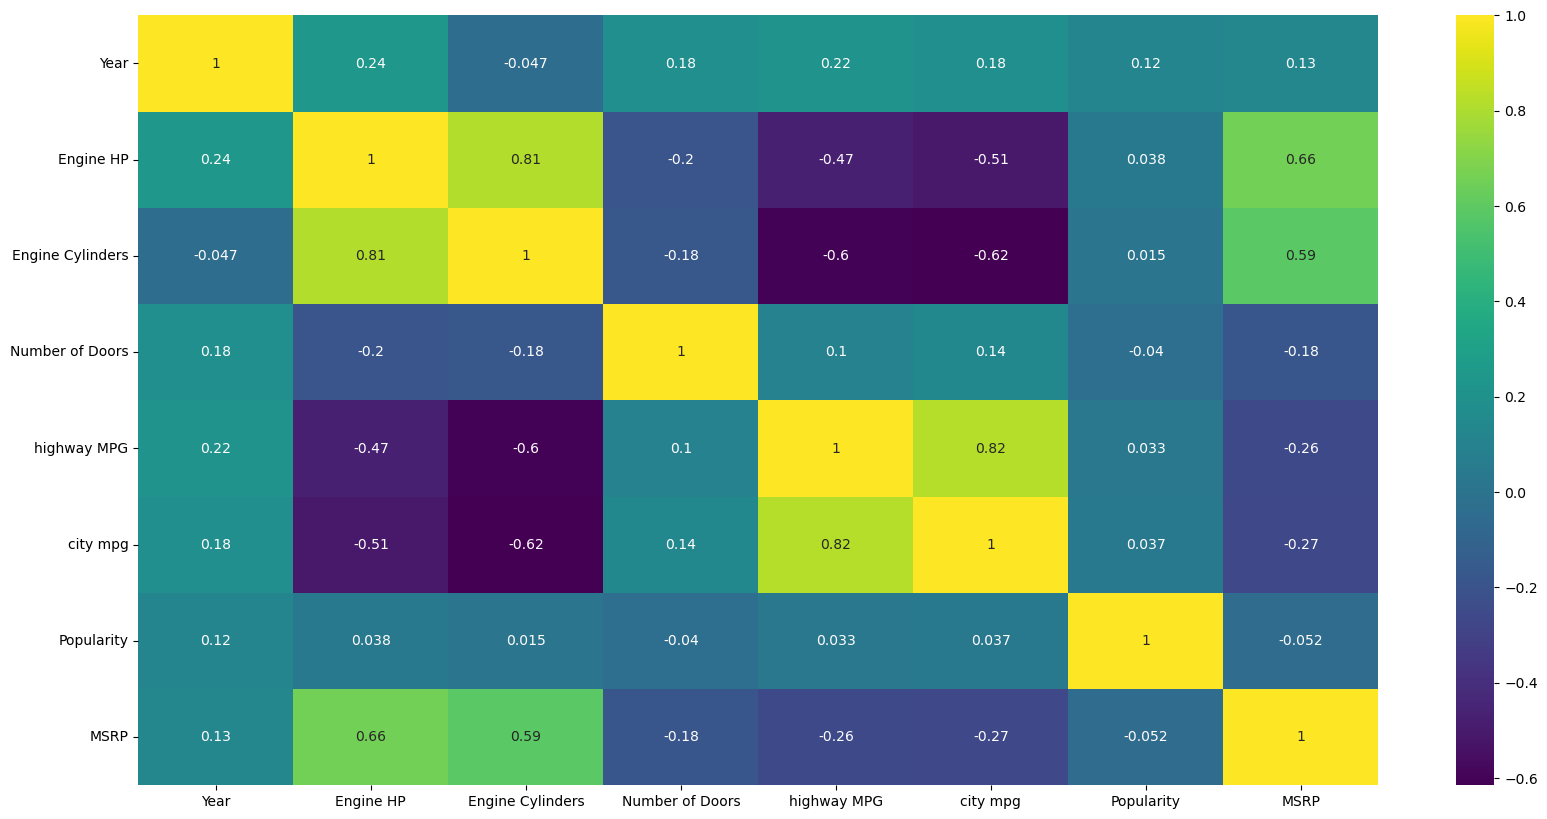

In [12]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

Typecasting

In [13]:
cat_data=data.select_dtypes(include=['object'])

In [14]:
num_data=num_data=data.select_dtypes(include=['float64','int64'])
num_data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


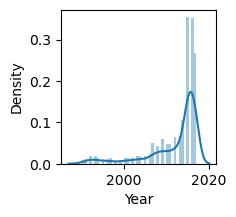

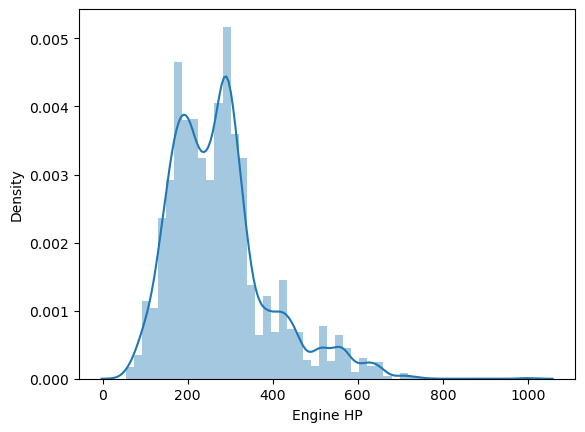

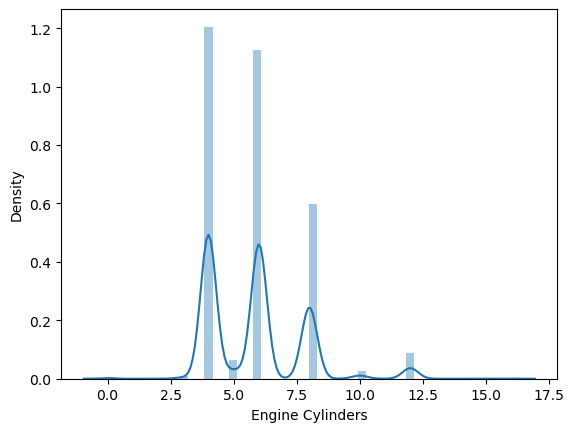

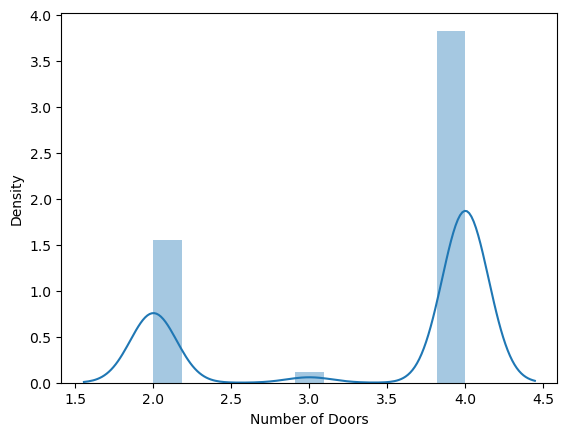

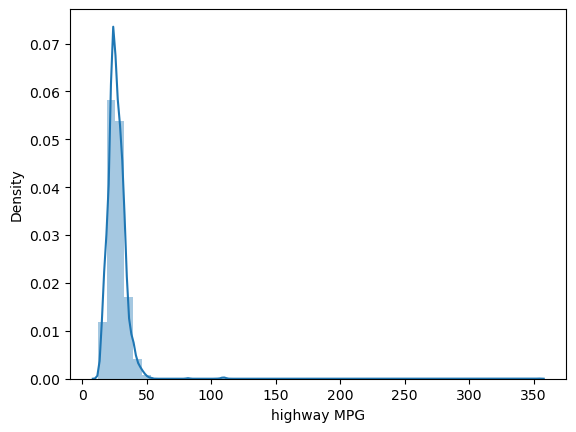

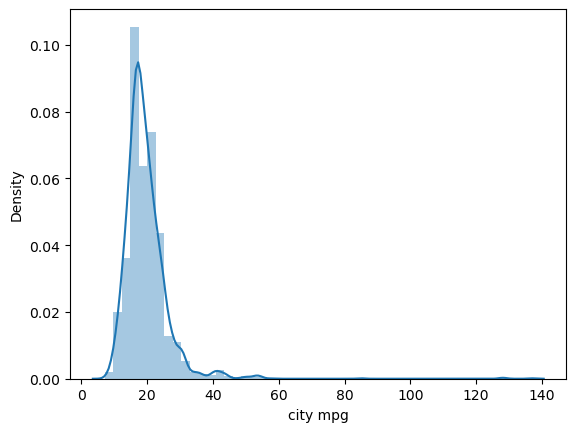

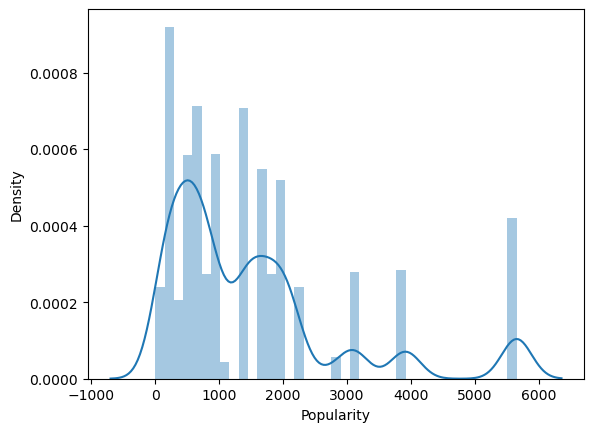

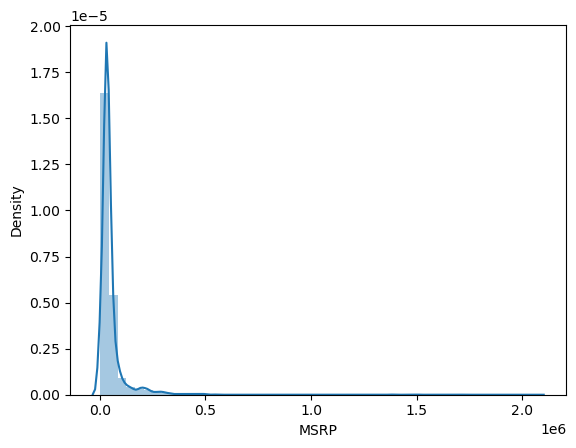

In [15]:
#Distribution plot
plt.figure(figsize=(2,2))
for i in num_data:
  sns.distplot(num_data[i])
  plt.show()

# BOXPLOT

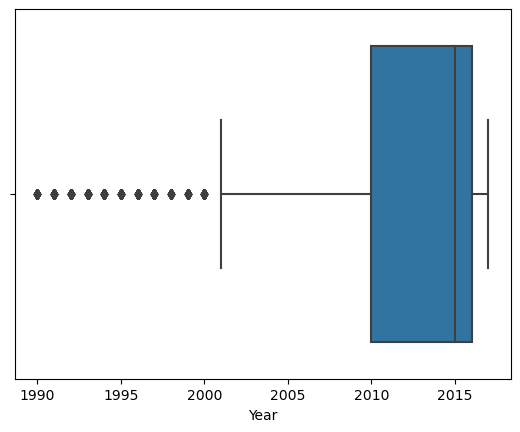

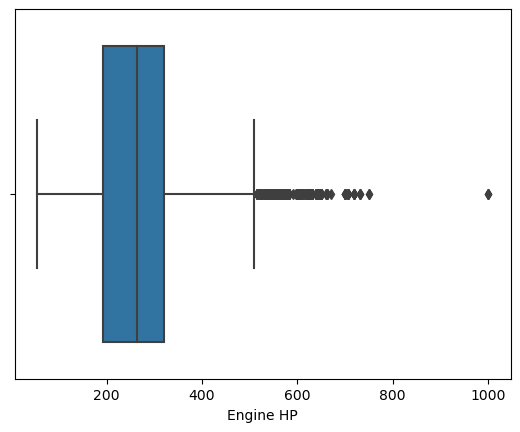

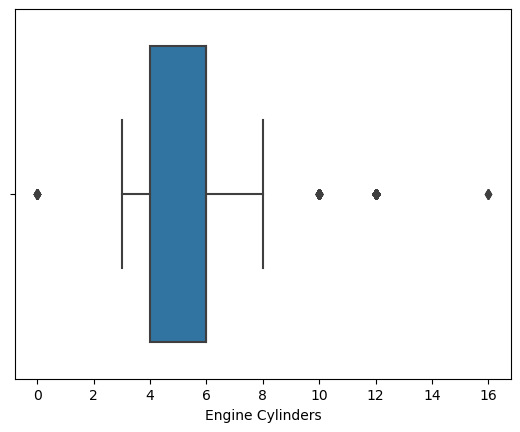

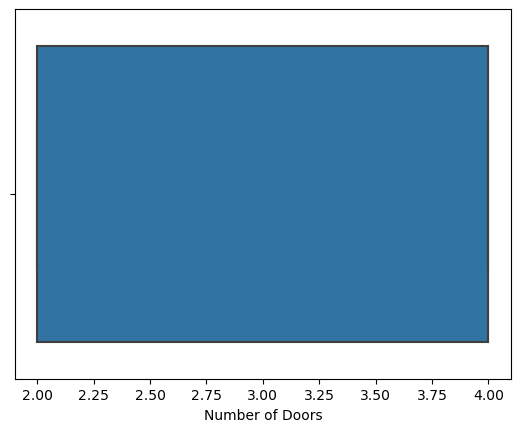

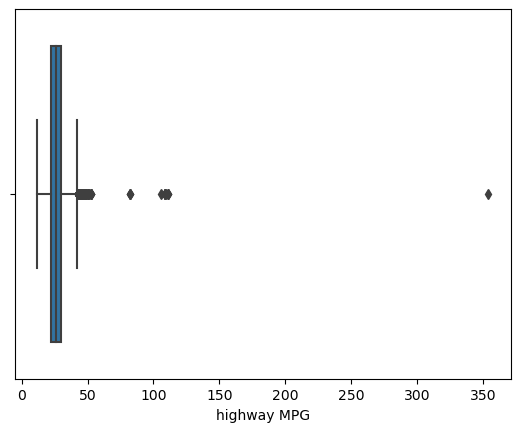

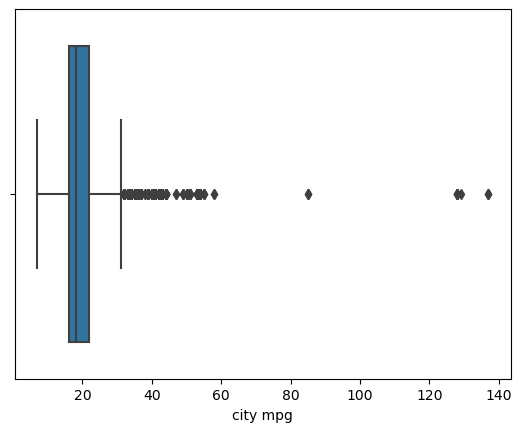

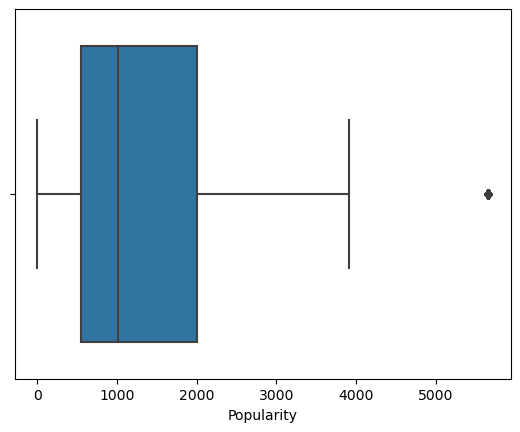

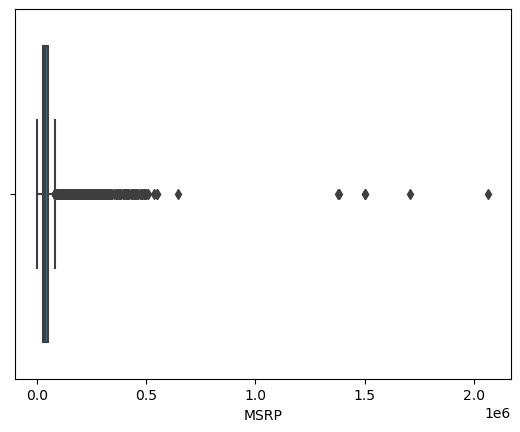

In [16]:
for i in num_data:
  sns.boxplot(x=num_data[i])
  plt.show()

DATA PREPROCESSING Outliers found in:year,Engine HP,Engine Cylinders,highway MPG,city mpg,popularity


In [17]:
#Outlier removal Removing outlier using Interquartile range method

In [18]:
from scipy import stats

In [19]:
# Calculate the IQR
IQR =stats.iqr(data['Engine Cylinders'],interpolation='midpoint')
IQR

2.0

In [20]:
Q1=data['Engine Cylinders'].quantile(0.25)
Q3=data['Engine Cylinders'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.0, 9.0)

In [21]:
data.loc[data['Engine Cylinders']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
460,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,223970
461,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,219775
462,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
463,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,224585
464,Ferrari,456M,2003,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,13,259,208295
11395,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,13,259,223295
11448,Rolls-Royce,Wraith,2014,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,284900
11449,Rolls-Royce,Wraith,2015,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,294025


In [22]:
data.loc[data['Engine Cylinders']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
5790,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5791,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5792,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5793,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,106,129,3916,43600
9867,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,26685
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170


In [23]:
data.loc[data['Engine Cylinders']>max_limit,'Engine Cylinders']=np.median(data['Engine Cylinders'])

In [24]:
data.loc[data['Engine Cylinders']<min_limit,'Engine Cylinders']=np.median(data['Engine Cylinders'])

In [25]:
# Calculate the IQR
IQR =stats.iqr(data['Engine HP'],interpolation='midpoint')
IQR

128.0

In [26]:
Q1=data['Engine HP'].quantile(0.25)
Q3=data['Engine HP'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 512.0)

In [27]:
data.loc[data['Engine HP']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
466,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
467,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
468,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
469,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,288000
470,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,BMW,X5 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
11510,BMW,X5 M,2017,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800
11523,BMW,X6 M,2015,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102100
11524,BMW,X6 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102200


In [28]:
data.loc[data['Engine HP']>max_limit,'Engine HP']=np.median(data['Engine HP'])

In [29]:
# Calculate the IQR
IQR =stats.iqr(data['highway MPG'],interpolation='midpoint')
IQR

8.0

In [30]:
Q1=data['highway MPG'].quantile(0.25)
Q3=data['highway MPG'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.0, 42.0)

In [31]:
data.loc[data['highway MPG']>max_limit,'highway MPG']=np.median(data['highway MPG'])

In [32]:
# Calculate the IQR
IQR =stats.iqr(data['city mpg'],interpolation='midpoint')
IQR

6.0

In [33]:
Q1=data['city mpg'].quantile(0.25)
Q3=data['city mpg'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(7.0, 31.0)

In [34]:
data.loc[data['city mpg']>max_limit,'city mpg']=np.median(data['city mpg'])

In [35]:
# Calculate the IQR
IQR =stats.iqr(data['Year'],interpolation='midpoint')
IQR

6.0

In [36]:
Q1=data['Year'].quantile(0.25)
Q3=data['Year'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2001.0, 2025.0)

In [37]:
# Remove outliers
data.drop(data[(data['Year']<min_limit)].index,inplace=True)

In [38]:
data.shape

(7441, 16)

In [39]:
# Remove outliers
data.drop(data[(data['Popularity']>max_limit)].index,inplace=True)

In [40]:
data.shape

(5748, 16)

In [42]:
num_data= data[['Year','Engine HP','Engine Cylinders','highway MPG','city mpg','Popularity']]

PLOTS AFTER OUTLIER REMOVAL


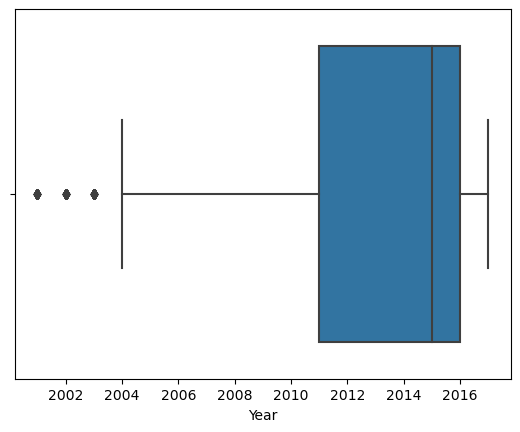

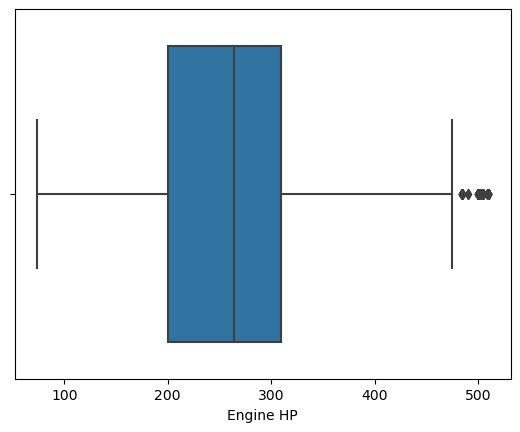

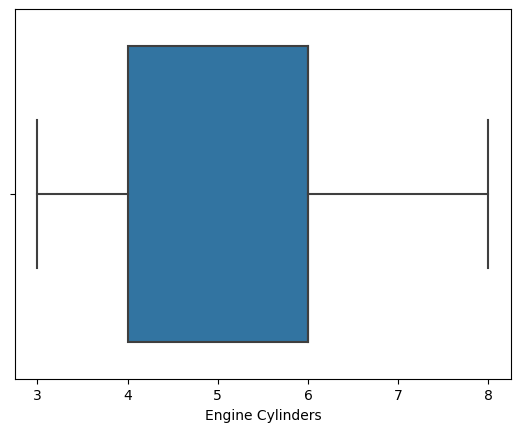

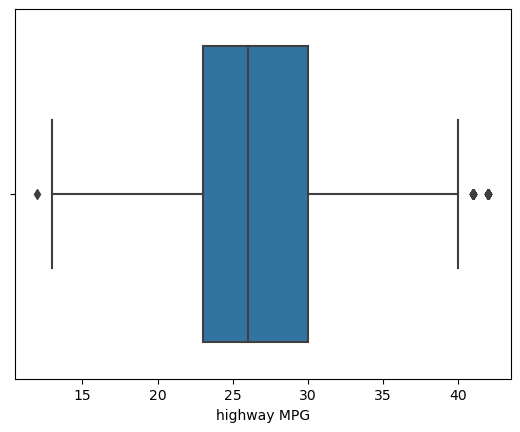

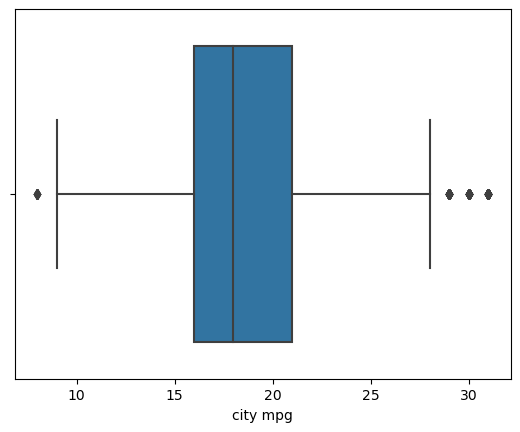

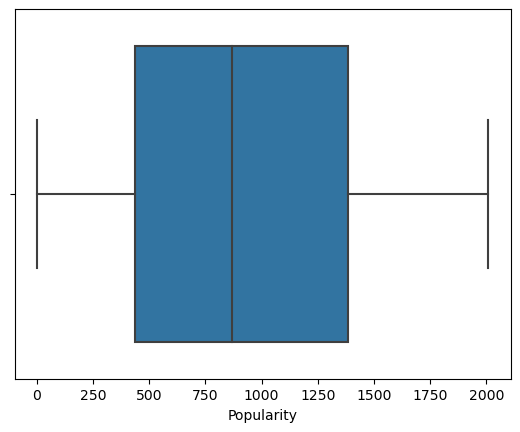

In [43]:
for i in num_data:
  sns.boxplot(x=num_data[i])
  plt.show()

#New outliers occure after outlier removal but we are proceeding with this num_data

# LABEL ENCODING

In [44]:
cat_data

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()
data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Market Category']=le.fit_transform(data['Market Category'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])


In [47]:
# split data into feature and target
x = data.drop(['MSRP'], axis=1)
y = data['MSRP']

SCALLING

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
data_scaled.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,0.25,0.000000,1.000,0.714286,0.197248,0.2,1.000000,1.000000,0.0,0.984375,0.0,0.400000,0.766667,0.782609,0.407075
1,0.25,0.000000,1.000,0.714286,0.197248,0.2,1.000000,1.000000,0.0,0.984375,0.0,0.400000,0.766667,0.782609,0.407075
2,0.25,0.000000,1.000,0.714286,0.197248,0.2,1.000000,1.000000,0.0,0.984375,0.0,0.400000,0.766667,0.782609,0.407075
3,0.20,0.004167,0.875,0.571429,0.252294,0.2,0.333333,0.666667,1.0,0.593750,1.0,0.933333,0.800000,0.652174,0.503737
4,0.20,0.004167,0.875,0.571429,0.252294,0.2,0.333333,0.666667,1.0,0.593750,1.0,0.933333,0.800000,0.652174,0.503737


In [49]:
x=data_scaled

In [50]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LINEAR REGRESSION

In [51]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)
y_pred

array([ 74207.39883654,  40613.95239797,  83534.1312137 , ...,
       160059.28815891,  48611.3510131 ,  95430.97877803])

In [52]:
#checking the model accuracy

Mean absolute error

In [53]:
from sklearn.metrics import mean_absolute_error
print('MAE = ',mean_absolute_error(y_train,y_train_pred))

MAE =  33275.84520373276


In [54]:
#Mean sqaured error

In [55]:
from sklearn.metrics import mean_squared_error
print('MSE = ',mean_squared_error(y_test,y_pred))

MSE =  3295665839.5526953


In [56]:
#R2 score

In [57]:
from sklearn.metrics import r2_score
print('r2 score = ',r2_score(y_test,y_pred))

r2 score =  0.27032157545728563


# Lasso regression method

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1)
model=lasso.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('MSE = ',mean_squared_error(y_test,y_pred))
print('MAE = ',mean_absolute_error(y_test,y_pred))
print('r2 score = ',r2_score(y_test,y_pred))

MSE =  3102296173.167486
MAE =  31172.632020592813
r2 score =  0.2823326295556903


# Decision tree regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
decreg=DecisionTreeRegressor(random_state=42)
model=decreg.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE = ',mean_squared_error(y_test,y_pred))
print('r2 score = ',r2_score(y_test,y_pred))

MSE =  784625033.5028039
r2 score =  0.8184893533218645


In [63]:
#Tunning

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'max_depth': randint(1, 10),  # Randomly select max_depth from 1 to 10
    'min_samples_split': randint(2, 20),  # Randomly select min_samples_split from 2 to 20
    'min_samples_leaf': randint(1, 10),  # Randomly select min_samples_leaf from 1 to 10
}

# Create the Decision Tree Regressor
tree = DecisionTreeRegressor()

# Perform random search cross-validation
random_search = RandomizedSearchCV(tree, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(x, y)  # X and y are your input features and target variable



RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024BF77F7F10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024BF77F7310>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024BF7760190>},
                   scoring='neg_mean_squared_error')

In [65]:
# Print the best parameters and best MSE score
print("Best Parameters: ", random_search.best_params_)
print("Best MSE Score: ", -random_search.best_score_)

Best Parameters:  {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best MSE Score:  3304911289.1765013


# As we can see the decision tree regressor gives a better r2 score 0.818 and min MSE as acompared to lasso and linear regression before tunning so we can choose decison tree regressor model.